# Лабораторная работа №1 
## Стемасов Илья
## 16 B-2
### Вариант №7

Камеры
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
3. Постройте график изменения средней цены на камеры по годам.
4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.
5. Добавьте в набор данных признак, являющийся произведением двух других признаков.
6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.
8. Определите год, в который было выпущено максимально количество новых камер.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
data = pd.read_csv("C:\camera_dataset.csv", delimiter=',')

In [3]:
data = data.convert_objects(convert_numeric=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 13 columns):
Model                      1039 non-null object
Release date               1038 non-null float64
Max resolution             1038 non-null float64
Low resolution             1038 non-null float64
Effective pixels           1038 non-null float64
Zoom wide (W)              1038 non-null float64
Zoom tele (T)              1038 non-null float64
Normal focus range         1038 non-null float64
Macro focus range          1037 non-null float64
Storage included           1036 non-null float64
Weight (inc. batteries)    1036 non-null float64
Dimensions                 1036 non-null float64
Price                      1038 non-null float64
dtypes: float64(12), object(1)
memory usage: 101.5+ KB


c:\users\zver\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [3]:
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agfa ePhoto 1280,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0


In [4]:
data.tail()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1034,Toshiba PDR-M65,2001.0,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1035,Toshiba PDR-M70,2000.0,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1036,Toshiba PDR-M71,2001.0,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1037,Toshiba PDR-M81,2001.0,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0
1038,Toshiba PDR-T10,2002.0,1600.0,800.0,1.0,38.0,38.0,40.0,20.0,8.0,180.0,86.0,129.0


In [5]:
data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [6]:
data.shape

(1039, 13)

In [7]:
data.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

### 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). 

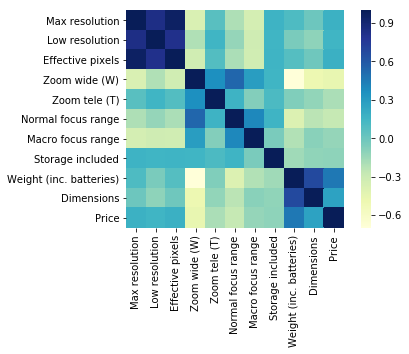

In [8]:
data_heatmap = data.drop(['Model', 'Release date'], axis=1).corr()
sns.heatmap(data_heatmap, cmap="YlGnBu", square=True)
plt.show()

### 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков.

                   Price  Max resolution  Low resolution
Price           1.000000        0.183202        0.154179
Max resolution  0.183202        1.000000        0.838381
Low resolution  0.154179        0.838381        1.000000
                   Price  Max resolution  Low resolution
Price           1.000000        0.101269        0.150699
Max resolution  0.101269        1.000000        0.877851
Low resolution  0.150699        0.877851        1.000000


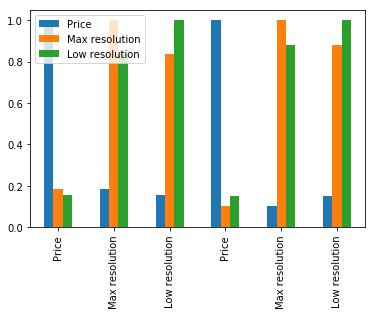

In [9]:
print(data[['Price', 'Max resolution', 'Low resolution']].corr(method='pearson'))
print(data[['Price', 'Max resolution', 'Low resolution']].corr(method='spearman'))
spearPears = pd.concat([data[['Price', 'Max resolution', 'Low resolution']].corr(method='pearson'), 
                       data[['Price', 'Max resolution', 'Low resolution']].corr(method='spearman')])
spearPears.plot.bar()
plt.show()

### 3. Постройте график изменения средней цены на камеры по годам.

Release date
1994.0    129.000000
1995.0    129.000000
1996.0    554.000000
1997.0    367.181818
1998.0    382.750000
1999.0    349.641509
2000.0    482.442623
2001.0    635.188235
2002.0    552.370787
2003.0    413.316832
2004.0    507.673759
2005.0    448.930070
2006.0    367.934641
2007.0    436.036810
Name: Price, dtype: float64


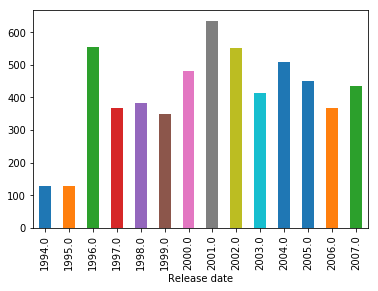

In [10]:
mean_price = data.groupby('Release date')['Price'].mean()
print (mean_price)
mean_price.plot.bar()
plt.show()

### 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.

In [16]:
kort = data['Model'].to_string().split('\n')
i=0
dictSearch = []
while(True):
    if i < len(kort):
        search = re.search(' [A-z]+ ', str(kort[i]), re.MULTILINE)
        dictSearch.append(search.group())
        i+=1
    else:
        break
counter = {}
for elem in dictSearch:
    counter[elem] = counter.get(elem, 0) + 1
doubles = {element: count for element, count in counter.items() if count > 1}
max(doubles, key=doubles.get)

' Olympus '

### 5. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [12]:
data['Result'] = data['Weight (inc. batteries)'] + data['Dimensions']
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Result
0,STRING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agfa ePhoto 1280,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,515.0
2,Agfa ePhoto 1680,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,578.0
3,Agfa ePhoto CL18,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,0.0
4,Agfa ePhoto CL30,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,0.0


### 6. Удалите строки с нулевыми значениями в данных.

In [13]:
data = data[data != 0].dropna()
data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Result
6,Agfa ePhoto CL45,2001.0,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0,389.0
10,Canon PowerShot A10,2001.0,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,485.0
11,Canon PowerShot A100,2002.0,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,335.0
12,Canon PowerShot A20,2001.0,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,485.0
13,Canon PowerShot A200,2002.0,1600.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,335.0
14,Canon PowerShot A30,2002.0,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,350.0,110.0,139.0,460.0
15,Canon PowerShot A300,2003.0,2048.0,1600.0,3.0,33.0,33.0,20.0,5.0,32.0,225.0,111.0,139.0,336.0
17,Canon PowerShot A40,2002.0,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,350.0,110.0,139.0,460.0
20,Canon PowerShot A420,2006.0,2272.0,1600.0,4.0,39.0,125.0,47.0,1.0,16.0,200.0,103.0,139.0,303.0
21,Canon PowerShot A430,2006.0,2272.0,1600.0,4.0,39.0,156.0,47.0,1.0,16.0,210.0,103.0,139.0,313.0


### 7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [14]:
model = data.groupby('Model')['Price'].max().sort_values()
print ("Minimum: " + model.index[0] + ", Maximum: " + model.index[len(model) - 1])

Minimum: JVC GC-QX5HD, Maximum: Ricoh RDC-i500


### 8. Определите год, в который было выпущено максимально количество новых камер.

2007.0    130
2006.0    112
2005.0    111
2004.0    100
2003.0     78
2001.0     74
2002.0     70
2000.0     50
1999.0     33
1998.0     15
Name: Release date, dtype: int64


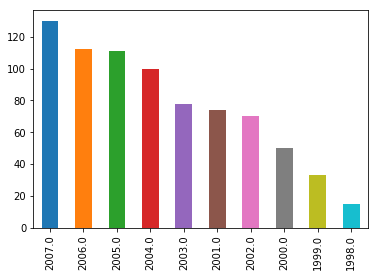

In [15]:
maxCameraRel = data['Release date'].sort_values().value_counts()
print(maxCameraRel)
maxCameraRel.plot.bar()
plt.show()